In [22]:
from fn_cfg import *
import params as cfg

def extractEDF(file_name,local_directory):
    subfolder = file_name[:-7]
    directory = local_directory + '/' + subfolder + '/' + file_name
    edf_file = mne.io.read_raw_edf(directory)
    raw_data = edf_file.get_data()
    info = edf_file.info
    fs = int(info['sfreq'])
    data_Cz = raw_data[10]
    Ts = (np.arange(0,len(data_Cz)/fs,1/fs)).reshape(len(np.arange(0,len(data_Cz)/fs,1/fs)),1)
    return data_Cz,info,fs,Ts


local_dir = '/Users/joshuaighalo/Downloads/files-2'
data = extractEDF('S011R02.edf',local_dir)
eeg_Cz = data[0]
info = data[1]
fs = data[2]
Ts = data[3]

Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S011/S011R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


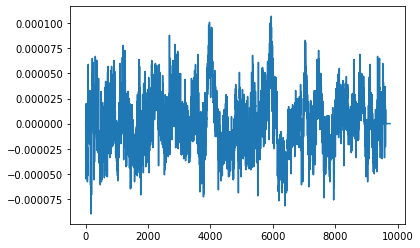

In [2]:
plt.plot(eeg_Cz)

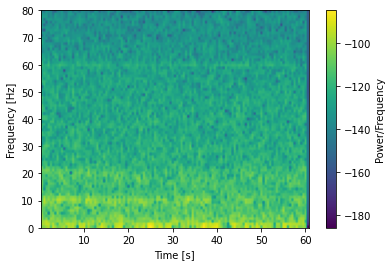

In [3]:
plt.figure('Spectrogram')
d, f, t, im = plt.specgram(eeg_Cz, NFFT=fs, Fs=fs, noverlap=fs/2)
plt.colorbar(label= "Power/Frequency")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.show()

In [10]:
files_EO = []
files_EC = []
for root, dirs, files in os.walk(local_dir):
    if files:
        files_EO.append(sorted(files)[0])
        files_EC.append(sorted(files)[2])
files_EO = files_EO[1:]
files_EC = files_EC[1:]
print(files_EC)

['S038R02.edf', 'S007R02.edf', 'S031R02.edf', 'S009R02.edf', 'S036R02.edf', 'S096R02.edf', 'S062R02.edf', 'S065R02.edf', 'S091R02.edf', 'S053R02.edf', 'S098R02.edf', 'S054R02.edf', 'S008R02.edf', 'S037R02.edf', 'S030R02.edf', 'S039R02.edf', 'S006R02.edf', 'S001R02.edf', 'S055R02.edf', 'S052R02.edf', 'S099R02.edf', 'S090R02.edf', 'S064R02.edf', 'S063R02.edf', 'S097R02.edf', 'S041R02.edf', 'S079R02.edf', 'S046R02.edf', 'S084R02.edf', 'S070R02.edf', 'S048R02.edf', 'S077R02.edf', 'S083R02.edf', 'S023R02.edf', 'S024R02.edf', 'S012R02.edf', 'S015R02.edf', 'S049R02.edf', 'S082R02.edf', 'S076R02.edf', 'S071R02.edf', 'S085R02.edf', 'S078R02.edf', 'S047R02.edf', 'S040R02.edf', 'S014R02.edf', 'S013R02.edf', 'S025R02.edf', 'S022R02.edf', 'S103R02.edf', 'S104R02.edf', 'S105R02.edf', 'S102R02.edf', 'S066R02.edf', 'S092R02.edf', 'S059R02.edf', 'S095R02.edf', 'S061R02.edf', 'S057R02.edf', 'S068R02.edf', 'S050R02.edf', 'S004R02.edf', 'S003R02.edf', 'S035R02.edf', 'S032R02.edf', 'S051R02.edf', 'S056R02.

In [17]:
eeg_EO = []
eeg_EC = []
for i in range(len(files_EO)):
    data = extractEDF(files_EO[i],local_dir)
    eeg_EO.append(data[0])
    data = extractEDF(files_EC[i],local_dir)
    eeg_EC.append(data[0])

eeg_EO = np.array(eeg_EO)
eeg_EC = np.array(eeg_EC)

Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S038/S038R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S038/S038R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S007/S007R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S007/S007R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S031/S031R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/joshuaighalo/Downloads/files-2/S031/S031R02.edf...
EDF file detected
Setting channel info structure...

/var/folders/ry/jhpq361x33g2tv7b7l6j0md80000gn/T/ipykernel_49241/3093892045.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eeg_EO = np.array(eeg_EO)
/var/folders/ry/jhpq361x33g2tv7b7l6j0md80000gn/T/ipykernel_49241/3093892045.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eeg_EC = np.array(eeg_EC)


In [ ]:
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]
delta_MT11 = averageBandPower(bp_MT11,'3D',fs,delta_low,delta_high,win)